In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from early_tde_classification.config import Config

# whether to plot errors
plot_errors = False


In [40]:
all_features = pd.read_csv(os.path.join(Config.OUT_FEATURES_DIR, 'features_all.csv'))

tdes = all_features[all_features['data_origin']=='ztf_tdes']
tns = all_features[all_features['data_origin']=='tns']
simbad = all_features[all_features['data_origin']=='simbad']


In [41]:
tdes.r_chisq.describe()

count    25.000000
mean      4.762948
std       7.930714
min       0.290378
25%       0.875235
50%       1.341496
75%       3.423226
max      29.812010
Name: r_chisq, dtype: float64

In [42]:
simbad.r_chisq.describe()

count    43411.000000
mean        57.588291
std        122.252992
min          0.014814
25%          7.523939
50%         22.880646
75%         62.004335
max       9308.300397
Name: r_chisq, dtype: float64

In [43]:
tns.r_chisq.describe()

count    1212.000000
mean        3.986724
std        15.510053
min         0.009164
25%         0.353326
50%         0.787310
75%         2.370730
max       277.980766
Name: r_chisq, dtype: float64

### Apply rchisq filter

In [51]:
rchisq_thresh = 10
all_features = all_features[all_features.r_chisq <= rchisq_thresh]

tdes = all_features[all_features['data_origin']=='ztf_tdes']
tns = all_features[all_features['data_origin']=='tns']
simbad = all_features[all_features['data_origin']=='simbad']

#tdes = tdes[tdes.objId == 'ZTF18aahqkbt']

### Plot

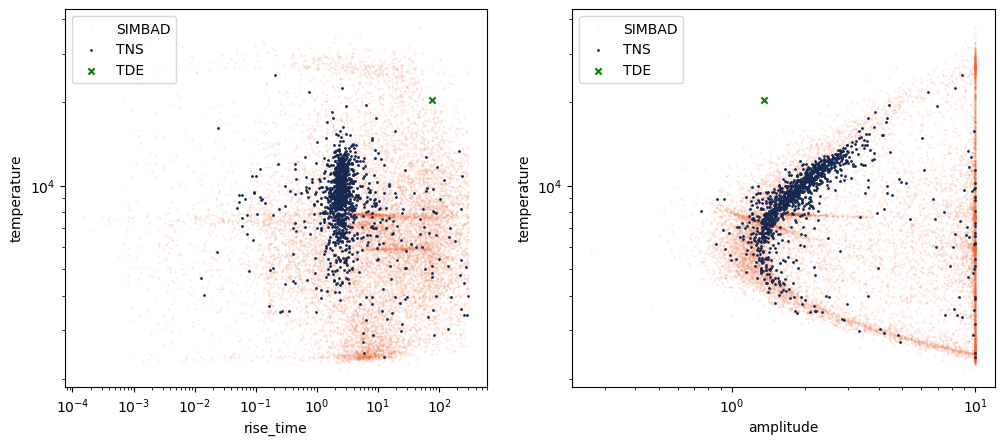

In [52]:
colors = ['#F5622E', '#15284F', "green"]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.scatter(simbad['rise_time'], simbad['temperature'], label='SIMBAD', c=colors[0] , alpha=0.1, s=0.5)
ax1.scatter(tns['rise_time'], tns['temperature'], label='TNS', c=colors[1], s=1)
if plot_errors:
    ax1.errorbar(tdes['rise_time'], tdes['temperature'], yerr = tdes['err_temperature'], xerr = tdes['err_rise_time'],
                elinewidth = 0.1, fmt = 'x', label = 'TDE', c = colors[2], markersize = 3)
else:
    ax1.scatter(tdes['rise_time'], tdes['temperature'], label = 'TDE', c = colors[2], s = 20, marker = 'x')


ax1.set_xlabel('rise_time')
ax1.set_ylabel('temperature')
ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.set_xlim(left = 0.8 * np.nanmin(tdes['rise_time']))
ax1.legend()

ax2.scatter(simbad['amplitude'], simbad['temperature'], label='SIMBAD', c=colors[0] , alpha=0.1, s=0.5)
ax2.scatter(tns['amplitude'], tns['temperature'], label='TNS', c=colors[1], s=1)
if plot_errors:
    ax2.errorbar(tdes['amplitude'], tdes['temperature'], yerr = tdes['err_temperature'], xerr = tdes['err_amplitude'],
            elinewidth = 0.1, fmt = 'x', label = 'TDE', c = colors[2], markersize = 3)
else:
    ax2.scatter(tdes['amplitude'], tdes['temperature'], label = 'TDE', c = colors[2], s = 20, marker = 'x')

ax2.set_xlabel('amplitude')
ax2.set_ylabel('temperature')
ax2.set_yscale('log')
ax2.set_xscale('log')
#ax2.set_xlim(left = 0.8 * np.min(tdes['amplitude']))
ax2.legend()




In [50]:
tdes[tdes.temperature < 7000]

,objId,alertId,type,ref_time,amplitude,rise_time,temperature,r_chisq,data_origin
44624,ZTF18aabtxvd,ZTF18aabtxvd-152,TDE,58394.873067,1.547409,196.078704,5367.429221,0.338357,ztf_tdes
